<a href="https://colab.research.google.com/github/ShivamKumar-bit/Random-Forest/blob/master/Random_forest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [59]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.datasets import load_iris


In [60]:
iris = load_iris()
iris.keys()


dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [61]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [62]:
df = pd.DataFrame(iris.data,columns=iris.feature_names)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [63]:
df['target']=iris.target
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [64]:
#df['target_names']=iris.target
#df1=df.replace({'target1': {0: 'setosa', 1: 'versicolor',2:'virginica'}})
#merged = pd.concat([df,df1],axis='columns')
#merged.head()

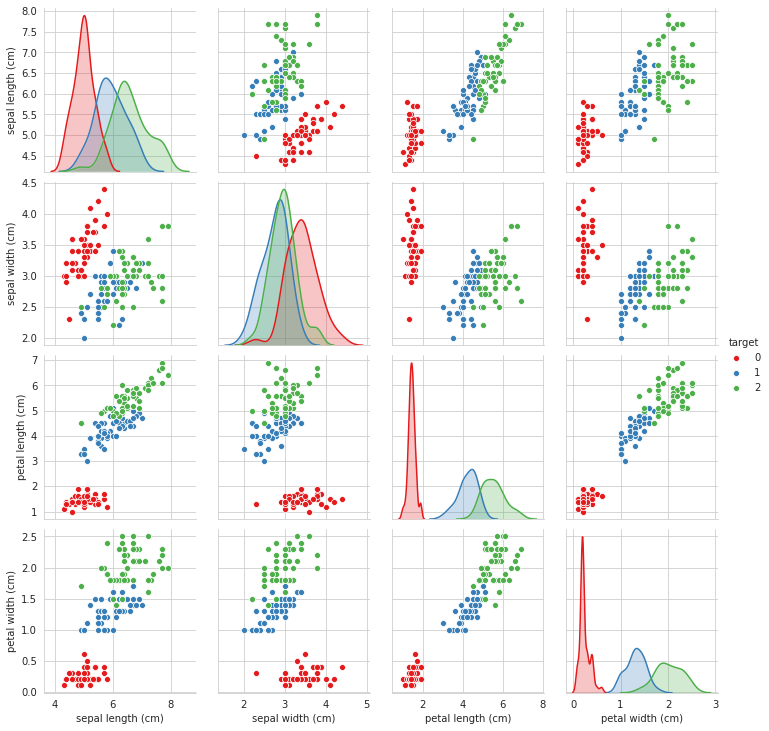

In [65]:
sns.pairplot(df,hue='target',palette='Set1')

In [79]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df.drop(['target'],axis='columns'),iris.target,test_size=0.1)

In [97]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=1)
model.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=1,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [98]:
pred = model.predict(X_test)
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         4
           1       1.00      0.83      0.91         6
           2       0.83      1.00      0.91         5

    accuracy                           0.93        15
   macro avg       0.94      0.94      0.94        15
weighted avg       0.94      0.93      0.93        15



In [99]:
gmodel = RandomForestClassifier(n_estimators=10)
gmodel.fit(X_train, y_train)
gpred = gmodel.predict(X_test)
print(classification_report(y_test,gpred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         4
           1       1.00      1.00      1.00         6
           2       1.00      1.00      1.00         5

    accuracy                           1.00        15
   macro avg       1.00      1.00      1.00        15
weighted avg       1.00      1.00      1.00        15



In [100]:
cm= confusion_matrix(y_test,gpred)

Text(69.0, 0.5, 'truth')

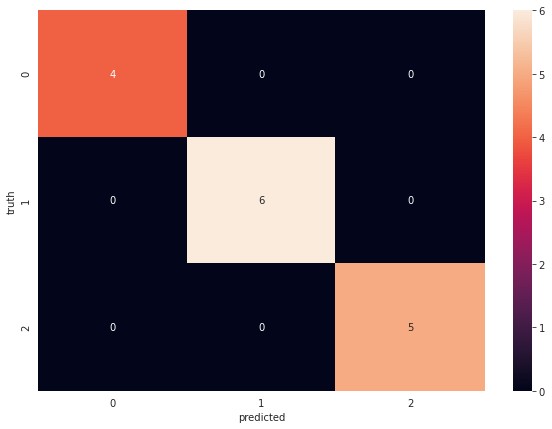

In [101]:
plt.figure(figsize=(10,7))
sns.heatmap(cm,annot=True)
plt.xlabel("predicted")
plt.ylabel("truth")